In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sports-classification/EfficientNetB0-100-(224 X 224)- 98.40.h5
/kaggle/input/sports-classification/sports.csv
/kaggle/input/sports-classification/valid/bobsled/5.jpg
/kaggle/input/sports-classification/valid/bobsled/1.jpg
/kaggle/input/sports-classification/valid/bobsled/4.jpg
/kaggle/input/sports-classification/valid/bobsled/3.jpg
/kaggle/input/sports-classification/valid/bobsled/2.jpg
/kaggle/input/sports-classification/valid/hurdles/5.jpg
/kaggle/input/sports-classification/valid/hurdles/1.jpg
/kaggle/input/sports-classification/valid/hurdles/4.jpg
/kaggle/input/sports-classification/valid/hurdles/3.jpg
/kaggle/input/sports-classification/valid/hurdles/2.jpg
/kaggle/input/sports-classification/valid/snow boarding/5.jpg
/kaggle/input/sports-classification/valid/snow boarding/1.jpg
/kaggle/input/sports-classification/valid/snow boarding/4.jpg
/kaggle/input/sports-classification/valid/snow boarding/3.jpg
/kaggle/input/sports-classification/valid/snow boarding/2.jpg
/kaggl

In [ ]:
from pathlib import Path

def find_root():
    base = Path("/kaggle/input")
    candidates = [
        base / "sports-classification",
        base / "100-sports-image-classification",
    ]
    for c in candidates:
        if (c/"train").exists() and ((c/"valid").exists() or (c/"val").exists()):
            return c
        if (c/"test").exists():
            return c

    for p in base.iterdir():
        if not p.is_dir(): 
            continue
        if (p/"train").exists() and ((p/"valid").exists() or (p/"val").exists()):
            return p
        if (p/"test").exists():
            return p
        for q in p.iterdir():
            if q.is_dir() and (q/"train").exists() and ((q/"valid").exists() or (q/"val").exists()):
                return q
            if q.is_dir() and (q/"test").exists():
                return q
    return None

ROOT = find_root()
assert ROOT is not None, "Dataset not attached. Click ‘Add data’ and add gpiosenka / 100 Sports Image Classification."

VALID_DIR = ROOT/("valid" if (ROOT/"valid").exists() else "val")

TRAIN_DIR = ROOT/"train"
TEST_DIR  = ROOT/"test"

print("ROOT:", ROOT)
print("TRAIN:", TRAIN_DIR, "->", TRAIN_DIR.exists())
print("VALID:", VALID_DIR, "->", VALID_DIR.exists())
print("TEST :", TEST_DIR,  "->", TEST_DIR.exists())


ROOT: /kaggle/input/sports-classification
TRAIN: /kaggle/input/sports-classification/train -> True
VALID: /kaggle/input/sports-classification/valid -> True
TEST : /kaggle/input/sports-classification/test -> True


In [4]:

classes = sorted([d.name for d in Path(TRAIN_DIR).iterdir() if d.is_dir()])
print("number of classes :", len(classes))
print(" first 20 classes:", classes[:20])

number of classes : 100
 first 20 classes: ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading']


In [6]:
def count_images_per_class(root: Path, exts=(".jpg", ".jpeg", ".png")):
    out = {}
    for d in sorted([x for x in root.iterdir() if x.is_dir()]):
        n = 0
        for ext in exts:
            n += len(list(d.glob(f"*{ext}")))
        out[d.name] = n
    return out

In [7]:
train_counts = count_images_per_class(Path(TRAIN_DIR))
valid_counts = count_images_per_class(Path(VALID_DIR))
test_counts = count_images_per_class(Path(TEST_DIR))

print(" number of pictures in train:", sum(train_counts.values()))
print(" number of pictures in valid:", sum(valid_counts.values()))
print(" number of pictures in test :", sum(test_counts.values()))


 number of pictures in train: 13492
 number of pictures in valid: 500
 number of pictures in test : 500


In [8]:
import random, math
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path


def sample_paths(root: Path, n_classes=12, per_class=1):
    class_dirs = [d for d in root.iterdir() if d.is_dir()]
    if not class_dirs:
        return []
    n_classes = min(n_classes, len(class_dirs))
    chosen = random.sample(class_dirs, n_classes)
    paths = []
    for d in chosen:
        imgs = list(d.glob("*.jpg")) + list(d.glob("*.jpeg")) + list(d.glob("*.png"))
        if imgs:
            paths.append((random.choice(imgs), d.name))
    return paths

samples = sample_paths(Path(TRAIN_DIR), n_classes=12, per_class=1)

## show sample of data

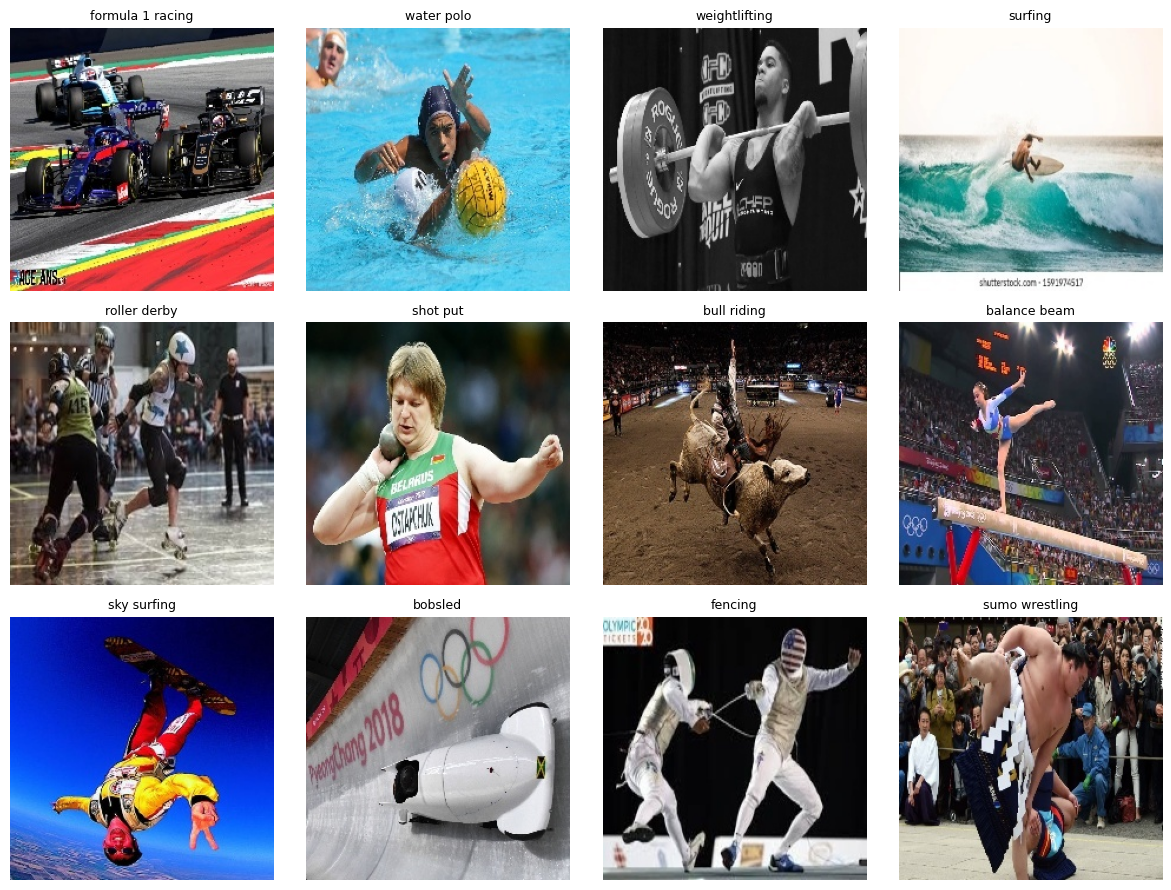

In [10]:
cols = 4
rows = math.ceil(len(samples)/cols) if samples else 1
plt.figure(figsize=(cols*3, rows*3))
for i, (p, lbl) in enumerate(samples, 1):
    ax = plt.subplot(rows, cols, i)
    img = Image.open(p).convert("RGB")
    ax.imshow(img)
    ax.set_title(lbl, fontsize=9)
    ax.axis("off")
plt.tight_layout()
plt.show()

In [11]:
SEED = 42
tf.random.set_seed(SEED); np.random.seed(SEED); random.seed(SEED)
IMG_SIZE = (224, 224)
BATCH   = 32
AUTOTUNE = tf.data.AUTOTUNE

### build model with different (dropout , filters , activation ) with Total params: 1867812
best one give val_acc=0.6120

In [ ]:


from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR, image_size=IMG_SIZE, batch_size=BATCH, shuffle=True, seed=SEED)
val_ds = tf.keras.utils.image_dataset_from_directory(
    VALID_DIR, image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", num_classes)

data_aug = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
], name="aug")
rescale = layers.Rescaling(1./255)

def preprocess(x, y, train=False):
    if train:
        x = data_aug(x, training=True)
    x = rescale(x)
    return x, y

train_ds = (train_ds
            .map(lambda x,y: preprocess(x,y,True),  num_parallel_calls=AUTOTUNE)
            .cache().prefetch(AUTOTUNE))
val_ds   = (val_ds
            .map(lambda x,y: preprocess(x,y,False), num_parallel_calls=AUTOTUNE)
            .cache().prefetch(AUTOTUNE))

assert 'train_ds' in globals() and 'val_ds' in globals(), "Please define train_ds/val_ds first."
assert 'class_names' in globals(), "Please define class_names first."
num_classes = len(class_names)

def safe_name(filters, drop, act):
    f_txt = "-".join(str(f) for f in filters)
    d_txt = str(drop).replace(".", "p")
    return f"CNN_{f_txt}_{d_txt}_{act}"

def build_cnn(filters=(64,128,256,512), drop=0.35, act="relu", lr=5e-4,
              dense_units=512, bn=True):
    """
    Bigger CNN:
      - Conv2D (+ optional BatchNorm) + Activation + MaxPool + Dropout, repeated
      - GlobalAveragePooling
      - Optional Dense head to increase parameters
      - Final softmax
    """
    model = keras.Sequential(name=safe_name(filters, drop, act))
    model.add(layers.Input(shape=(*IMG_SIZE, 3)))

    for f in filters:
        model.add(layers.Conv2D(f, 3, padding="same", use_bias=not bn))
        if bn:
            model.add(layers.BatchNormalization())
            model.add(layers.Activation(act))
        else:
            model.add(layers.Activation(act))
        model.add(layers.MaxPooling2D())
        model.add(layers.Dropout(drop))

    model.add(layers.GlobalAveragePooling2D())

    if dense_units and dense_units > 0:
        model.add(layers.Dense(dense_units))
        model.add(layers.Activation(act))
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

EPOCHS = 100
experiments = [
    {"name": "BIG_4blocks_relu_bn_d512",
     "filters": (64,128,256,512), "drop": 0.35, "act": "relu",
     "epochs": EPOCHS, "lr": 5e-4, "dense": 512, "bn": True},

    {"name": "BIGGER_5blocks_relu_bn_d512",
     "filters": (64,128,256,512,512), "drop": 0.40, "act": "relu",
     "epochs": EPOCHS, "lr": 3e-4, "dense": 512, "bn": True},

    {"name": "BIG_4blocks_elu_bn_d512",
     "filters": (64,128,256,512), "drop": 0.35, "act": "elu",
     "epochs": EPOCHS, "lr": 5e-4, "dense": 512, "bn": True},
]

results = []
best_overall = -1.0
best_history = None
best_model_name = None
best_ckpt = None

for cfg in experiments:
    print("\n" + "="*70)
    print(f"Training {cfg['name']} | filters={cfg['filters']} drop={cfg['drop']} act={cfg['act']}")
    keras.backend.clear_session()

    model = build_cnn(cfg["filters"], cfg["drop"], cfg["act"],
                      lr=cfg["lr"], dense_units=cfg.get("dense", 0), bn=cfg.get("bn", True))

    print("Total params:", model.count_params())

    ckpt_path = f"best_{cfg['name']}.keras"
    callbacks = [
        keras.callbacks.ModelCheckpoint(ckpt_path, monitor="val_accuracy",
                                        save_best_only=True, mode="max"),
        keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=12,
                                      restore_best_weights=True, mode="max"),
        keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                          factor=0.5, patience=5,
                                          min_lr=1e-6, mode="max", verbose=1),
    ]

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=cfg["epochs"],
        callbacks=callbacks,
        verbose=1
    )

    best_val_acc = float(max(history.history["val_accuracy"]))
    results.append({
        "name": cfg["name"],
        "filters": cfg["filters"],
        "drop": cfg["drop"],
        "act": cfg["act"],
        "best_val_acc": best_val_acc,
        "ckpt": ckpt_path
    })
    print(f"Best val_acc: {best_val_acc:.4f} | saved -> {ckpt_path}")

    if best_val_acc > best_overall:
        best_overall   = best_val_acc
        best_history   = history.history
        best_model_name = cfg["name"]
        best_ckpt      = ckpt_path

results_sorted = sorted(results, key=lambda d: d["best_val_acc"], reverse=True)
print("\n==== Experiments Summary ====")
for r in results_sorted:
    print(f"{r['name']:>28} | val_acc={r['best_val_acc']:.4f} | {r['ckpt']}")
print("\n>> Best Model:",
      results_sorted[0]['name'],
      f"(val_acc={results_sorted[0]['best_val_acc']:.4f}) -> {results_sorted[0]['ckpt']}")


Found 13492 files belonging to 100 classes.


I0000 00:00:1756644534.557004      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756644534.557690      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 500 files belonging to 100 classes.
Classes: 100

Training BIG_4blocks_relu_bn_d512 | filters=(64, 128, 256, 512) drop=0.35 act=relu
Total params: 1867812
Epoch 1/100


I0000 00:00:1756644542.997725     109 service.cc:148] XLA service 0x7bbdbc10ee60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756644542.999417     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756644542.999441     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756644543.718377     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/422 ━━━━━━━━━━━━━━━━━━━━ 2:28:30 21s/step - accuracy: 0.0312 - loss: 5.2044

I0000 00:00:1756644559.295398     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


422/422 ━━━━━━━━━━━━━━━━━━━━ 93s 171ms/step - accuracy: 0.0497 - loss: 4.3834 - val_accuracy: 0.0460 - val_loss: 4.4260 - learning_rate: 5.0000e-04
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 62s 146ms/step - accuracy: 0.1127 - loss: 3.7371 - val_accuracy: 0.0800 - val_loss: 4.0337 - learning_rate: 5.0000e-04
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 61s 144ms/step - accuracy: 0.1596 - loss: 3.4408 - val_accuracy: 0.1180 - val_loss: 3.7719 - learning_rate: 5.0000e-04
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 143ms/step - accuracy: 0.1818 - loss: 3.2539 - val_accuracy: 0.1040 - val_loss: 4.2556 - learning_rate: 5.0000e-04
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 143ms/step - accuracy: 0.2130 - loss: 3.0972 - val_accuracy: 0.1100 - val_loss: 4.4073 - learning_rate: 5.0000e-04
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 143ms/step - accuracy: 0.2432 - loss: 2.9503 - val_accuracy: 0.1500 - val_loss: 4.3189 - learning_rate: 5.0000e-04
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 143ms/s

# test best model on test data and give (Accuracy: 0.6220)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

assert 'results_sorted' in globals() and len(results_sorted) > 0, "No results_sorted found. Run training cell first."
best_ckpt = results_sorted[0]['ckpt']
print("Best checkpoint:", best_ckpt)
model = keras.models.load_model(best_ckpt)

if 'test_ds' not in globals():
    if 'TEST_DIR' in globals() and Path(TEST_DIR).exists():
        test_root = Path(TEST_DIR)
    else:
        if 'TRAIN_DIR' in globals():
            test_root = Path(TRAIN_DIR).parent / "test"
        elif 'VALID_DIR' in globals():
            test_root = Path(VALID_DIR).parent / "test"
        else:
            raise RuntimeError("Cannot infer TEST_DIR. Please define TEST_DIR to your test folder.")
        if not test_root.exists():
            raise FileNotFoundError(f"TEST_DIR not found at: {test_root}")

    print("TEST_DIR:", test_root)

    AUTOTUNE = getattr(tf.data, "AUTOTUNE", tf.data.AUTOTUNE)
    tmp_test = tf.keras.utils.image_dataset_from_directory(
        test_root, image_size=IMG_SIZE, batch_size=BATCH, shuffle=False
    )
    if 'rescale' not in globals():
        rescale = layers.Rescaling(1./255)
    test_ds = tmp_test.map(lambda x,y: (rescale(x), y), num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

correct, total = 0, 0
for xb, yb in test_ds:
    prob = model.predict(xb, verbose=0)
    pred = np.argmax(prob, axis=1)
    y_np = yb.numpy()
    correct += (pred == y_np).sum()
    total   += y_np.size

test_acc = correct / total if total > 0 else 0.0
print(f"\n=== TEST RESULTS ===")
print(f"Images: {total} | Accuracy: {test_acc:.4f}")


Best checkpoint: best_BIG_4blocks_relu_bn_d512.keras
TEST_DIR: /kaggle/input/sports-classification/test
Found 500 files belonging to 100 classes.

=== TEST RESULTS ===
Images: 500 | Accuracy: 0.6220


In [14]:
from tensorflow import keras

best_ckpt = "best_BIG_4blocks_relu_bn_d512.keras"   
best_model = keras.models.load_model(best_ckpt)
print("Loaded:", best_ckpt)
best_model.summary()

Loaded: best_BIG_4blocks_relu_bn_d512.keras


Model: "CNN_64-128-256-512_0p35_relu"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 512)    │     1,179,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,599,598 (21.36 MB)

 Trainable params: 1,865,892 (7.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 3,731,786 (14.24 MB)

## build anthor model with Total params: 19,764,004 and give val_acc: 0.7520

In [15]:

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import math

assert 'train_ds' in globals() and 'val_ds' in globals(), "Define train_ds/val_ds first."
assert 'class_names' in globals(), "Define class_names first."
num_classes = len(class_names)

def safe_name(filters_per_block, drop, act):
    blocks = "_".join([f"{f}x{r}" for (f,r) in filters_per_block])
    d_txt = str(drop).replace(".","p")
    return f"MEGA_{blocks}_{d_txt}_{act}"

def build_cnn_mega(filters_per_block=[(64,2),(128,2),(256,3),(512,4),(512,4)],
                   drop=0.35, act="relu", lr=3e-4, dense_units=512, use_bn=True):
    """
    VGG-style:
      For each (filters, repeats): [Conv -> (BN) -> Act] * repeats, then MaxPool + Dropout
      Finally GAP -> Dense(dense_units) -> Dropout -> Dense(num_classes)
    Designed to exceed 15M parameters comfortably.
    """
    model = keras.Sequential(name=safe_name(filters_per_block, drop, act))
    model.add(layers.Input(shape=(*IMG_SIZE, 3)))

    for f, reps in filters_per_block:
        for _ in range(reps):
            model.add(layers.Conv2D(f, 3, padding="same", use_bias=not use_bn))
            if use_bn:
                model.add(layers.BatchNormalization())
            model.add(layers.Activation(act))
        model.add(layers.MaxPooling2D())
        model.add(layers.Dropout(drop))

    model.add(layers.GlobalAveragePooling2D())

    if dense_units and dense_units > 0:
        model.add(layers.Dense(dense_units))
        model.add(layers.Activation(act))
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

cfg = {
    "name": "MEGA_vgg_20M_relu_bn_d512",
    "filters_per_block": [(64,2),(128,2),(256,3),(512,4),(512,4)],  # كثافة كبيرة عند 512
    "drop": 0.35,
    "act": "relu",
    "lr": 3e-4,
    "dense_units": 512,
    "use_bn": True,
    "epochs": 100
}

keras.backend.clear_session()
mega_model = build_cnn_mega(
    filters_per_block=cfg["filters_per_block"],
    drop=cfg["drop"], act=cfg["act"],
    lr=cfg["lr"], dense_units=cfg["dense_units"], use_bn=cfg["use_bn"]
)

total_params = mega_model.count_params()
print("Model:", cfg["name"])
print("Total params:", f"{total_params:,}")

ckpt_path = f"best_{cfg['name']}.keras"
callbacks = [
    keras.callbacks.ModelCheckpoint(ckpt_path, monitor="val_accuracy",
                                    save_best_only=True, mode="max"),
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=12,
                                  restore_best_weights=True, mode="max"),
    keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.5,
                                      patience=5, min_lr=1e-6, mode="max", verbose=1),
]

history = mega_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=cfg["epochs"],
    callbacks=callbacks,
    verbose=1
)

best_val_acc = float(max(history.history["val_accuracy"]))
print(f"\nBest val_acc: {best_val_acc:.4f} | saved -> {ckpt_path}")

best_ckpt = ckpt_path
best_history = history.history
best_model_name = cfg["name"]


Model: MEGA_vgg_20M_relu_bn_d512
Total params: 19,764,004
Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 336s 692ms/step - accuracy: 0.0214 - loss: 4.6122 - val_accuracy: 0.0180 - val_loss: 6.3856 - learning_rate: 3.0000e-04
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 262s 622ms/step - accuracy: 0.0595 - loss: 4.0358 - val_accuracy: 0.0540 - val_loss: 4.5208 - learning_rate: 3.0000e-04
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 262s 621ms/step - accuracy: 0.0902 - loss: 3.7653 - val_accuracy: 0.0680 - val_loss: 5.5504 - learning_rate: 3.0000e-04
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 263s 623ms/step - accuracy: 0.1244 - loss: 3.5421 - val_accuracy: 0.1000 - val_loss: 4.2009 - learning_rate: 3.0000e-04
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 263s 623ms/step - accuracy: 0.1517 - loss: 3.3340 - val_accuracy: 0.1120 - val_loss: 4.3204 - learning_rate: 3.0000e-04
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 262s 620ms/step - accuracy: 0.1845 - loss: 3.1555 - val_accuracy: 0.0700 - val_loss: 6.2249 - le

#### test model on test data and give (0.7660) and this is the best one 

In [16]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from pathlib import Path

CKPT = "best_MEGA_vgg_20M_relu_bn_d512.keras"
print("Loading:", CKPT)
model = keras.models.load_model(CKPT)

if 'test_ds' not in globals():
    if 'TEST_DIR' in globals() and Path(TEST_DIR).exists():
        test_dir = Path(TEST_DIR)
    elif 'TRAIN_DIR' in globals():
        test_dir = Path(TRAIN_DIR).parent / "test"
    elif 'VALID_DIR' in globals():
        test_dir = Path(VALID_DIR).parent / "test"
    else:
        raise RuntimeError("Cannot infer TEST_DIR. Define TEST_DIR or make sure TRAIN_DIR/VALID_DIR are defined.")
    assert test_dir.exists(), f"TEST_DIR not found: {test_dir}"
    print("TEST_DIR:", test_dir)

    AUTOTUNE = tf.data.AUTOTUNE
    tmp_test = tf.keras.utils.image_dataset_from_directory(
        test_dir, image_size=IMG_SIZE, batch_size=BATCH, shuffle=False
    )
    if 'rescale' not in globals():
        rescale = layers.Rescaling(1./255)
    test_ds = tmp_test.map(lambda x,y: (rescale(x), y), num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

loss, acc = model.evaluate(test_ds, verbose=0)
print(f"\nTest Accuracy (model.evaluate): {acc:.4f}")

correct, total = 0, 0
for xb, yb in test_ds:
    prob = model.predict(xb, verbose=0)
    pred = np.argmax(prob, axis=1)
    y = yb.numpy()
    correct += (pred == y).sum()
    total   += y.size
print(f"Test Accuracy (manual): {correct/total:.4f}  | N={total}")


Loading: best_MEGA_vgg_20M_relu_bn_d512.keras

Test Accuracy (model.evaluate): 0.7660
Test Accuracy (manual): 0.7660  | N=500


In [17]:
import numpy as np

y_true, y_pred = [], []
for xb, yb in val_ds:
    prob = best_model.predict(xb, verbose=0)
    y_true.extend(yb.numpy())
    y_pred.extend(np.argmax(prob, axis=1))

y_true = np.array(y_true, dtype=int)
y_pred = np.array(y_pred, dtype=int)
print("Preds ready:", y_true.shape, y_pred.shape)


Preds ready: (500,) (500,)


#### calc the (Accuracy, Micro ,Macro)

In [18]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

acc = accuracy_score(y_true, y_pred)
p_micro, r_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average="micro", zero_division=0)
p_macro, r_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average="macro", zero_division=0)
per_p, per_r, per_f1, per_sup = precision_recall_fscore_support(
    y_true, y_pred, average=None, labels=range(len(class_names)), zero_division=0
)

print(f"Accuracy: {acc:.4f}")
print(f"Micro  — P: {p_micro:.4f} | R: {r_micro:.4f} | F1: {f1_micro:.4f}")
print(f"Macro  — P: {p_macro:.4f} | R: {r_macro:.4f} | F1: {f1_macro:.4f}")

per_df = pd.DataFrame({
    "class": class_names,
    "precision": per_p,
    "recall": per_r,
    "f1": per_f1,
    "support": per_sup
}).sort_values("f1", ascending=False)

display(per_df.head(10))   
display(per_df.tail(10))

Accuracy: 0.6120
Micro  — P: 0.6120 | R: 0.6120 | F1: 0.6120
Macro  — P: 0.6878 | R: 0.6120 | F1: 0.6022


,class,precision,recall,f1,support
59,olympic wrestling,1.000000,1.0,1.000000,5
91,ultimate,1.000000,1.0,1.000000,5
47,ice climbing,1.000000,1.0,1.000000,5
64,polo,1.000000,1.0,1.000000,5
70,rowing,1.000000,1.0,1.000000,5
49,jai alai,0.833333,1.0,0.909091,5
3,arm wrestling,0.833333,1.0,0.909091,5
7,baseball,1.000000,0.8,0.888889,5
19,cheerleading,1.000000,0.8,0.888889,5
52,judo,1.000000,0.8,0.888889,5


,class,precision,recall,f1,support
31,football,0.285714,0.4,0.333333,5
79,snow boarding,0.500000,0.2,0.285714,5
12,bmx,0.500000,0.2,0.285714,5
50,javelin,0.222222,0.4,0.285714,5
37,hammer throw,0.200000,0.4,0.266667,5
21,cricket,0.333333,0.2,0.250000,5
13,bobsled,0.333333,0.2,0.250000,5
33,frisbee,0.333333,0.2,0.250000,5
92,uneven bars,0.153846,0.4,0.222222,5
60,parallel bar,0.000000,0.0,0.000000,5


#### make Confusion Matrix

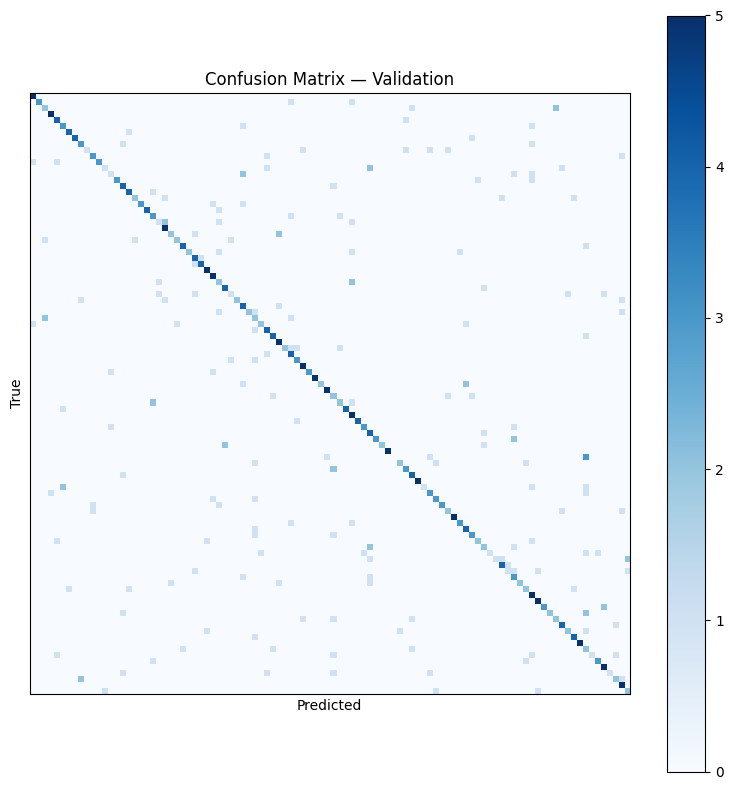

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.title("Confusion Matrix — Validation")
plt.colorbar()
plt.xticks([]); plt.yticks([])  
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout()
plt.show()


#### plot for val acc and train acc

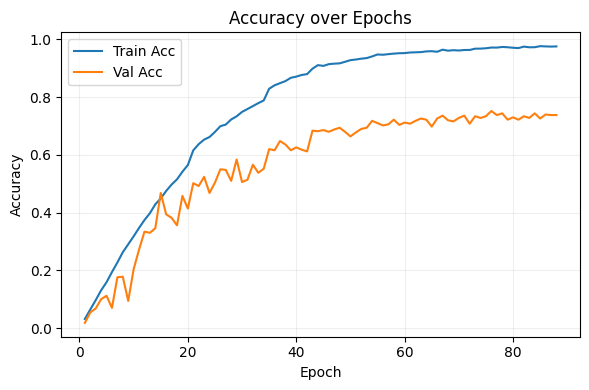

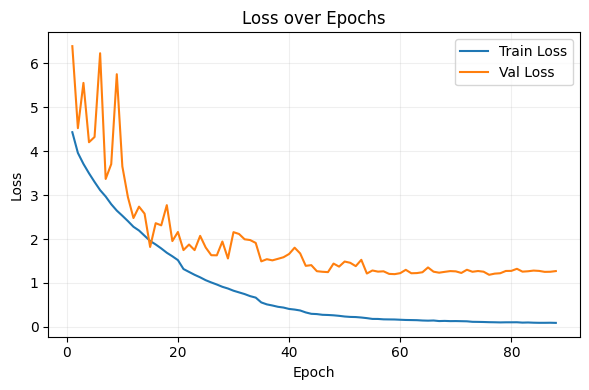

In [20]:
if 'best_history' in globals():
    import matplotlib.pyplot as plt
    epochs = range(1, len(best_history["accuracy"]) + 1)

    plt.figure(figsize=(6,4))
    plt.plot(epochs, best_history["accuracy"], label="Train Acc")
    plt.plot(epochs, best_history["val_accuracy"], label="Val Acc")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy over Epochs")
    plt.legend(); plt.grid(True, alpha=0.2); plt.tight_layout(); plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(epochs, best_history["loss"], label="Train Loss")
    plt.plot(epochs, best_history["val_loss"], label="Val Loss")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss over Epochs")
    plt.legend(); plt.grid(True, alpha=0.2); plt.tight_layout(); plt.show()
else:
    print("not found")


##### test anthor four model but the pervious one give higher than

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import time, numpy as np, pandas as pd

IMG_SIZE = (224, 224)
AUTOTUNE = tf.data.AUTOTUNE
num_classes = len(class_names)

def make_optimizer(name, lr):
    name = name.lower()
    if name == "adam":    return keras.optimizers.Adam(lr)
    if name == "rmsprop": return keras.optimizers.RMSprop(lr)
    if name == "sgd":     return keras.optimizers.SGD(lr, momentum=0.9, nesterov=True)
    raise ValueError(name)

def build_cnn(num_classes, filters=(64,128,256), drop=0.4, act="relu",
              opt="adam", lr=5e-4, bn=True, wd=1e-4, dense=512):
    m = keras.Sequential([layers.Input((*IMG_SIZE,3))], name=f"CNN_{'-'.join(map(str,filters))}_{str(drop).replace('.','p')}_{act}")
    # Conv blocks: Conv -> (BN) -> Act -> Pool -> Dropout
    for f in filters:
        m.add(layers.Conv2D(f, 3, padding="same",
                            use_bias=not bn,
                            kernel_regularizer=regularizers.l2(wd)))
        if bn:
            m.add(layers.BatchNormalization())
        m.add(layers.Activation(act))
        m.add(layers.MaxPooling2D())
        m.add(layers.Dropout(drop))
    m.add(layers.GlobalAveragePooling2D())
    if dense and dense > 0:
        m.add(layers.Dense(dense, kernel_regularizer=regularizers.l2(wd)))
        m.add(layers.Activation(act))
        m.add(layers.Dropout(0.5))
    m.add(layers.Dense(num_classes, activation="softmax"))
    m.compile(optimizer=make_optimizer(opt, lr),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
    return m

EPOCHS_TUNE = 100           
VAL_STEPS   = 32
PATIENCE_ES  = 4
PATIENCE_RLR = 3

_use_steps = ('STEPS_PER_EPOCH' in globals()) and (STEPS_PER_EPOCH is not None) and (STEPS_PER_EPOCH > 0)

grid = [
    {"name":"T1_adam_f64-128-256_lr5e-4_d0p4", "filters":(64,128,256),  "lr":5e-4, "drop":0.4, "opt":"adam",    "bn":True, "wd":1e-4, "dense":512},
    {"name":"T2_adam_f64-128-256-512_lr3e-4_d0p4", "filters":(64,128,256,512), "lr":3e-4, "drop":0.4, "opt":"adam", "bn":True, "wd":1e-4, "dense":512},
    {"name":"T3_rmsprop_f64-128-256_lr5e-4_d0p5",  "filters":(64,128,256),  "lr":5e-4, "drop":0.5, "opt":"rmsprop","bn":True, "wd":5e-5, "dense":512},
    {"name":"T4_sgd_f64-128-256_lr1e-2_d0p4",      "filters":(64,128,256),  "lr":1e-2, "drop":0.4, "opt":"sgd",    "bn":True, "wd":1e-4, "dense":512},
]

results = []
best_ckpt_tuning, best_val = None, -1.0

for cfg in grid:
    print("\n" + "="*70)
    print("Running:", cfg["name"])
    keras.backend.clear_session()

    model = build_cnn(num_classes,
                      filters=cfg["filters"], drop=cfg["drop"], act="relu",
                      opt=cfg["opt"], lr=cfg["lr"], bn=cfg["bn"], wd=cfg["wd"], dense=cfg["dense"])
    params = model.count_params()
    print("Params:", f"{params:,}")

    ckpt_path = f"tune_{cfg['name']}.keras"
    cbs = [
        keras.callbacks.ModelCheckpoint(ckpt_path, monitor="val_accuracy",
                                        save_best_only=True, mode="max"),
        keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=PATIENCE_ES,
                                      restore_best_weights=True, mode="max"),
        keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.5,
                                          patience=PATIENCE_RLR, min_lr=1e-5, mode="max", verbose=1),
    ]

    fit_kwargs = dict(
        train_ds=train_ds, validation_data=val_ds,
        epochs=EPOCHS_TUNE, callbacks=cbs, verbose=1
    )
    t0 = time.time()
    try:
        if _use_steps:
            h = model.fit(
                train_ds, validation_data=val_ds,
                epochs=EPOCHS_TUNE, callbacks=cbs, verbose=1,
                steps_per_epoch=STEPS_PER_EPOCH, validation_steps=VAL_STEPS
            )
        else:
            h = model.fit(
                train_ds, validation_data=val_ds,
                epochs=EPOCHS_TUNE, callbacks=cbs, verbose=1
            )
    except tf.errors.ResourceExhaustedError:
        print("⚠️ OOM: skipping this config.")
        continue

    dt = time.time() - t0
    best_va = float(max(h.history["val_accuracy"]))
    results.append({
        "name": cfg["name"], "filters": str(cfg["filters"]), "opt": cfg["opt"],
        "lr": cfg["lr"], "drop": cfg["drop"], "bn": cfg["bn"], "wd": cfg["wd"], "dense": cfg["dense"],
        "params": params, "best_val_acc": best_va, "ckpt": ckpt_path,
        "epochs_run": len(h.history["val_accuracy"]), "time_s": round(dt,1)
    })
    if best_va > best_val:
        best_val, best_ckpt_tuning = best_va, ckpt_path

print("\nBest from tuning:", best_ckpt_tuning, "| val_acc=", round(best_val, 4))
df_tune = pd.DataFrame(results).sort_values("best_val_acc", ascending=False)
display(df_tune)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plot_df = (df_tune[['name','best_val_acc']]
           .copy())
plot_df['best_val_acc'] = pd.to_numeric(plot_df['best_val_acc'], errors='coerce')
plot_df = plot_df.dropna().sort_values('best_val_acc', ascending=True) 

plt.figure(figsize=(9, 0.6*len(plot_df)+1))
bars = plt.barh(plot_df['name'], plot_df['best_val_acc'])
plt.xlabel("Best Val Accuracy")
plt.title("Hyperparameter Tuning — Comparison")
plt.xlim(0, 1) 
plt.gca().invert_yaxis() 

for i, v in enumerate(plot_df['best_val_acc'].to_numpy()):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path


if 'best_ckpt' in globals() and best_ckpt:
    ckpt = best_ckpt
elif 'results_sorted' in globals() and len(results_sorted) > 0:
    ckpt = results_sorted[0]['ckpt']
else:
    ckpt = "best_model.keras" 
best_name = Path(ckpt).stem.replace("best_", "")
final_ckpt = f"final_{best_name}.keras"
print("Best checkpoint:", ckpt)

model = keras.models.load_model(ckpt)
model.save(final_ckpt)
print("Saved:", final_ckpt)

assert 'val_ds'_


#### save best two model

In [ ]:
from pathlib import Path
import shutil

src = Path("best_BIG_4blocks_relu_bn_d512.keras")        
dst = Path("/kaggle/working/best_BIG_4blocks_relu_bn_d512.keras")

dst.parent.mkdir(parents=True, exist_ok=True)
shutil.copy2(src, dst)
print("Saved to:", dst)


In [ ]:
from pathlib import Path
import shutil

src = Path("best_BIG_4blocks_relu_bn_d512.keras")       
dst = Path("/kaggle/working/best_MEGA_vgg_20M_relu_bn_d512.keras")  
dst.parent.mkdir(parents=True, exist_ok=True)
shutil.copy2(src, dst)
print("Saved to:", dst)